In [59]:
import openaq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from aqtools import aqutils as u
api = openaq.OpenAQ()

In [81]:
# co
status, resp = api.measurements(city = 'San Francisco-Oakland-Fremont',
                                location='Oakland', parameter='co',
                                date_from='2022-05-01T00:00:00Z',
                                date_to='2022-05-01T00:00:00Z',
                                limit=10000)
r = resp['results']
df_co = pd.DataFrame(data=r)
co_local_dates = []
for date in df_co['date'].values:
    local_date = date['local']
    d = u.cleaning_date(local_date)
    co_local_dates.append(d)
df_co['date'] = co_local_dates
df_co = df_co.rename(columns={"value": "co"})
df_co = df_co.loc[:,['date','co']]
df_co = df_co.iloc[::-1]
df_co.head(3)
df_co

,date,co
7507,2021-01-29 17:00:00,0.33
7506,2021-01-29 18:00:00,0.43
7505,2021-01-29 19:00:00,0.85
7504,2021-01-29 20:00:00,0.78
7503,2021-01-29 21:00:00,0.65
...,...,...
4,2022-04-30 13:00:00,0.25
3,2022-04-30 14:00:00,0.25
2,2022-04-30 15:00:00,0.24
1,2022-04-30 16:00:00,0.23


In [83]:
# no2
status, resp = api.measurements(city = 'San Francisco-Oakland-Fremont',
                                location='Oakland', parameter='no2',
                                date_from='2021-05-01T00:00:00Z',
                                date_to='2022-05-01T00:00:00Z',
                                limit=7000)
r = resp['results']
df_no2 = pd.DataFrame(data=r)
no2_local_dates = []
for date in df_no2['date'].values:
    local_date = date['local']
    d = u.cleaning_date(local_date)
    no2_local_dates.append(d)
df_no2['date'] = no2_local_dates
df_no2 = df_no2.rename(columns={"value": "no2"})
df_no2 = df_no2.loc[:,['date','no2']]
df_no2 = df_no2.iloc[::-1]

df_no2.head(3)

,date,no2
5761,2021-06-10 07:00:00,0.006
5760,2021-06-10 08:00:00,0.004
5759,2021-06-10 09:00:00,0.006


In [89]:
# o3
status, resp = api.measurements(city = 'San Francisco-Oakland-Fremont',
                                location='Oakland', parameter='o3',
                                date_from='2021-05-01T00:00:00Z',
                                date_to='2022-05-01T00:00:00Z',
                                limit=7000)
r = resp['results']
df_o3 = pd.DataFrame(data=r)
o3_local_dates = []
for date in df_o3['date'].values:
    local_date = date['local']
    d = u.cleaning_date(local_date)
    o3_local_dates.append(d)
df_o3['date'] = o3_local_dates
df_o3 = df_o3.rename(columns={"value": "o3"})
df_o3 = df_o3.loc[:,['date','o3']]
df_o3 = df_o3.iloc[::-1]

df_o3.head(3)

,date,o3
5930,2021-05-27 12:00:00,0.031
5929,2021-05-27 13:00:00,0.029
5928,2021-05-27 14:00:00,0.027


In [92]:
# pm25
status, resp = api.measurements(city = 'San Francisco-Oakland-Fremont',
                                location='Oakland', parameter='pm25',
                                date_from='2021-05-01T00:00:00Z',
                                date_to='2022-05-01T00:00:00Z',
                                limit=7000)
r = resp['results']
df_pm25 = pd.DataFrame(data=r)
pm25_local_dates = []
for date in df_pm25['date'].values:
    local_date = date['local']
    d = u.cleaning_date(local_date)
    pm25_local_dates.append(d)
df_pm25['date'] = pm25_local_dates
df_pm25 = df_pm25.rename(columns={"value": "pm25"})
df_pm25 = df_pm25.loc[:,['date','pm25']]
df_pm25 = df_pm25.iloc[::-1]

df_pm25.head(3)

,date,pm25
5933,2021-06-14 03:00:00,-2
5932,2021-06-14 04:00:00,-1
5931,2021-06-14 06:00:00,0


In [93]:
co_set = set(co_local_dates)
no2_set = set(no2_local_dates)
o3_set = set(o3_local_dates)
pm25_set = set(pm25_local_dates)

temp_set = co_set.intersection(no2_set)
temp_set = temp_set.intersection(o3_set)
temp_set = temp_set.intersection(pm25_set)

In [109]:
df = df_co.merge(df_no2, how='inner', on='date')
df = df.merge(df_o3, how='inner', on='date')
df = df.merge(df_pm25, how='inner', on='date')
df = df.set_index(['date'])
df

,co,no2,o3,pm25
date,,,,
2021-06-14 03:00:00,0.24,0.003,0.013,-2
2021-06-14 06:00:00,0.27,0.005,0.013,0
2021-06-14 07:00:00,0.26,0.006,0.014,0
2021-06-14 09:00:00,0.30,0.004,0.017,3
2021-06-14 10:00:00,0.24,0.004,0.016,4
...,...,...,...,...
2022-04-30 13:00:00,0.25,0.003,0.029,8
2022-04-30 14:00:00,0.25,0.002,0.029,4
2022-04-30 15:00:00,0.24,0.002,0.029,4


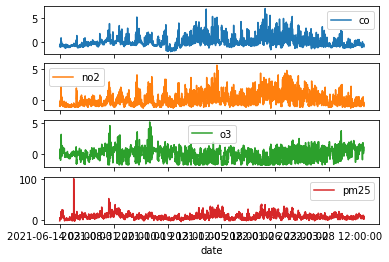

In [110]:
# Standardization
co = df['co'].values
co_standardized = (co - co.mean()) / co.std()
df['co'] = co_standardized

no2 = df['no2'].values

no2_standardized = (no2 - no2.mean()) / no2.std()
df['no2'] = no2_standardized

o3 = df['o3'].values
o3_standardized = (o3 - o3.mean()) / o3.std()
df['o3'] = o3_standardized
df.plot(subplots=True)
plt.show()


/tmp/ipykernel_962/1415402076.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'co'] = co_diff
/tmp/ipykernel_962/1415402076.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'no2'] = no2_diff
/tmp/ipykernel_962/1415402076.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

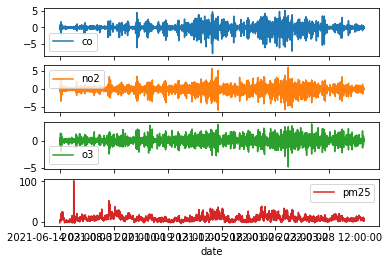

In [120]:
# Make data stationary
co_diff = u.differencing(df['co'].values)
no2_diff = u.differencing(df['no2'].values)
o3_diff = u.differencing(df['o3'].values)
pm25 = df.iloc[1:,-1]
# Delete the first row
df = df.iloc[:-1, :]

df.loc[:, 'co'] = co_diff
df.loc[:, 'no2'] = no2_diff
df.loc[:, 'o3'] = o3_diff
df.plot(subplots=True)
plt.show()

In [123]:
# feature vectors
feature_np = df.to_numpy()[:, :3]
print(feature_np)
# label
label_np = df.to_numpy()[:, -1]
X = []
y = []
for i in range(24, len(feature_np)):
    X.append(feature_np[i-24:i, :])
    y.append(label_np[i])

X, y = np.array(X, dtype=np.float64), np.array(y, dtype=np.float64)
X.shape, y.shape

[[-2.37815917e-01 -1.44978900e-01  8.49801010e-02]
 [ 2.97269896e-01 -4.34936700e-01  1.69960202e-01]
 [-5.94539792e-01  2.89957800e-01 -3.39920404e-01]
 ...
 [-5.94539792e-02  1.44978900e-01  0.00000000e+00]
 [ 2.22044605e-16  1.44978900e-01  2.54940303e-01]
 [            nan             nan             nan]]


((5619, 24, 3), (5619,))

In [124]:
TEST_SIZE = 500

X_train = X[:-TEST_SIZE]
y_train = y[:-TEST_SIZE]
X_test = X[-TEST_SIZE:]
y_test = y[-TEST_SIZE:]


X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5119, 24, 3), (5119,), (500, 24, 3), (500,))

In [125]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(GRU(units=50, activation="relu", return_sequences=True, input_shape = X_train[0].shape))
model.add(Dropout(0.2))
model.add(GRU(units=50, activation="relu", return_sequences=True, input_shape = X_train[0].shape))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 24, 50)            8250      
                                                                 
 dropout_6 (Dropout)         (None, 24, 50)            0         
                                                                 
 gru_7 (GRU)                 (None, 24, 50)            15300     
                                                                 
 dropout_7 (Dropout)         (None, 24, 50)            0         
                                                                 
 dense_3 (Dense)             (None, 24, 1)             51        
                                                                 
Total params: 23,601
Trainable params: 23,601
Non-trainable params: 0
_________________________________________________________________


In [126]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(loss='mse', optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False))
early_stop = EarlyStopping(monitor='val_loss', patience=5)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=200, callbacks=[early_stop])

Epoch 1/100
26/26 [==============================] - 5s 76ms/step - loss: 61.3358 - val_loss: 14.3513
Epoch 2/100
26/26 [==============================] - 2s 59ms/step - loss: 46.2971 - val_loss: 13.6138
Epoch 3/100
26/26 [==============================] - 2s 59ms/step - loss: 46.2267 - val_loss: 16.5338
Epoch 4/100
26/26 [==============================] - 1s 57ms/step - loss: 46.1484 - val_loss: 18.5471
Epoch 5/100
26/26 [==============================] - 2s 61ms/step - loss: 46.1669 - val_loss: 18.7184
Epoch 6/100
 5/26 [====>.........................] - ETA: 1s - loss: 45.8112

KeyboardInterrupt: 

In [ ]:
# pred = model.predict(X_test)
# print(pred.shape)
# plt.figure(figsize=(12,6))
# plt.plot(y_test, label='actual')
# plt.plot(pred, label='prediction')
# plt.grid()
# plt.legend(loc='best')
# plt.show()
mse,mae = model.evaluate(X_test,y_test,batch_size=50)